### Fase mesh

In [1]:
import cv2
from matplotlib import pyplot as plt
import mediapipe as mp
%matplotlib inline
%config InlineBackend.figure_format='retina'
print ("Ready.")

Ready.


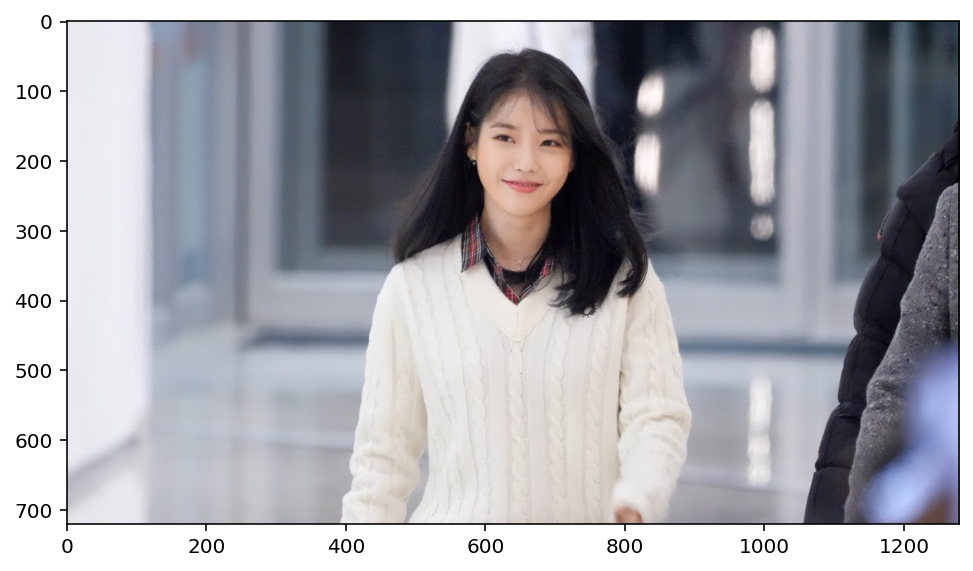

In [2]:
image = cv2.imread('../img/iu.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,8))
plt.imshow(image)
plt.show()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


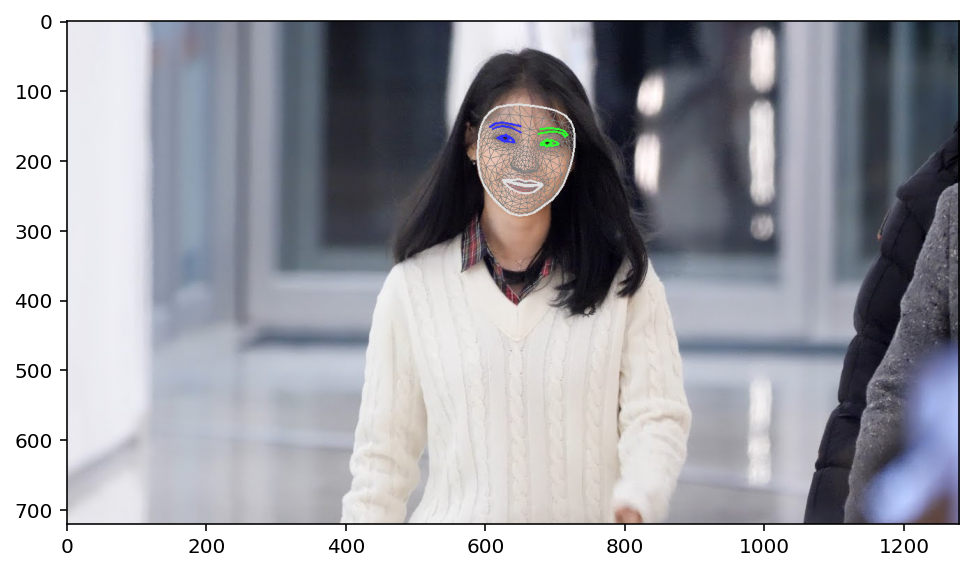

In [3]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)
face_mesh = mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5)
results = face_mesh.process(image)
annotated_image = image.copy()
for face_landmarks in results.multi_face_landmarks:
    # print('face_landmarks:', face_landmarks)
    mp_drawing.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks,
        connections=mp_face_mesh.FACEMESH_TESSELATION,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_tesselation_style())
    mp_drawing.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks,
        connections=mp_face_mesh.FACEMESH_CONTOURS,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_contours_style())
    mp_drawing.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks,
        connections=mp_face_mesh.FACEMESH_IRISES,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_iris_connections_style())
# Show
plt.figure(figsize=(8,8))
plt.imshow(annotated_image)
plt.show()